# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")


pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)


from sklearn.preprocessing import StandardScaler


from scipy.spatial.distance import cdist, pdist


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings

warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ycwang15/PGP_DSBA/Data/stock_data.csv.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [4]:
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


<IPython.core.display.Javascript object>

* The data looks good.

In [7]:
df.shape

(340, 15)

<IPython.core.display.Javascript object>

* 340 rows and 15 columns.

##### Check the missing value.

In [8]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* No missing value, good news.

##### Check the duplicated rows.

In [9]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplicated rows, good news.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [10]:
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Current Price', ylabel='Count'>

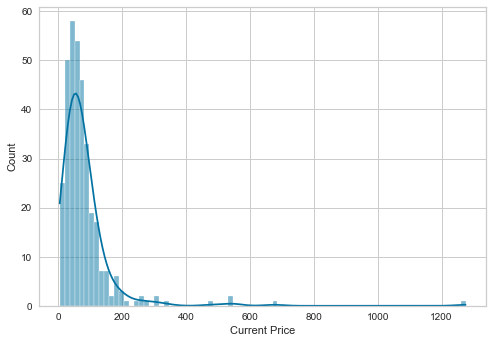

<IPython.core.display.Javascript object>

In [11]:
# Q1
sns.histplot(df, x="Current Price", kde=True)

* The distribution of Current Price is right skew.

In [12]:
# Q2
df.loc[df["Price Change"].idxmax()]["GICS Sector"]

'Information Technology'

<IPython.core.display.Javascript object>

* The stocks of Information Technology sector have seen the maximum price increase on average

<AxesSubplot:>

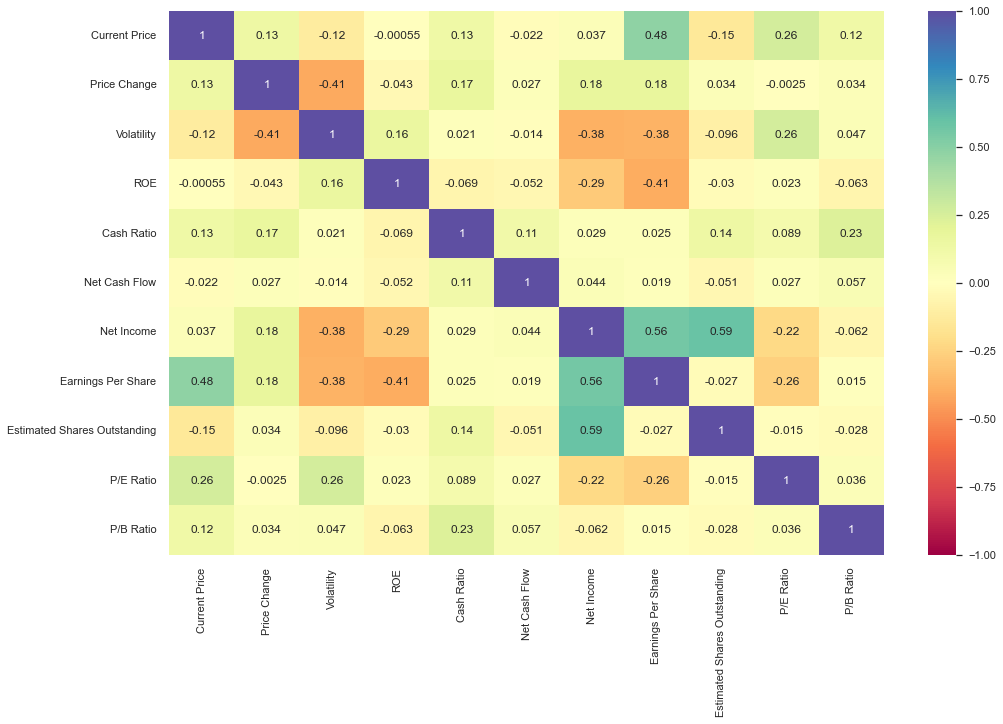

<IPython.core.display.Javascript object>

In [13]:
# Q3
df_cols = df.select_dtypes(include="number")
sns.set(rc={"figure.figsize": (16, 10)})
sns.heatmap(data=df_cols.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")

* There is no significant strong correlation between the variables.

In [14]:
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

In [15]:
# Q4
df.groupby(by=["GICS Sector"])["Cash Ratio"].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

<IPython.core.display.Javascript object>

* So, here we are, it shows the average of cash ratio of each GICS Sector from high to low.

In [16]:
df.groupby(by=["GICS Sector"])["P/E Ratio"].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

<IPython.core.display.Javascript object>

In [17]:
df.groupby(by=["GICS Sector"])["P/E Ratio"].std().sort_values(ascending=False)

GICS Sector
Consumer Discretionary         80.902902
Information Technology         70.242260
Health Care                    46.756416
Energy                         42.144306
Real Estate                    22.799372
Materials                      12.349729
Consumer Staples               10.291193
Industrials                     7.587633
Financials                      7.281892
Utilities                       5.143485
Telecommunications Services     4.210623
Name: P/E Ratio, dtype: float64

<IPython.core.display.Javascript object>

* We can noticed that Energy sector has the highest average of P/E ratio, but the consumer discretionary sector got the highest std.

In [18]:
## Set up function to allow us check the distribution of the data
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

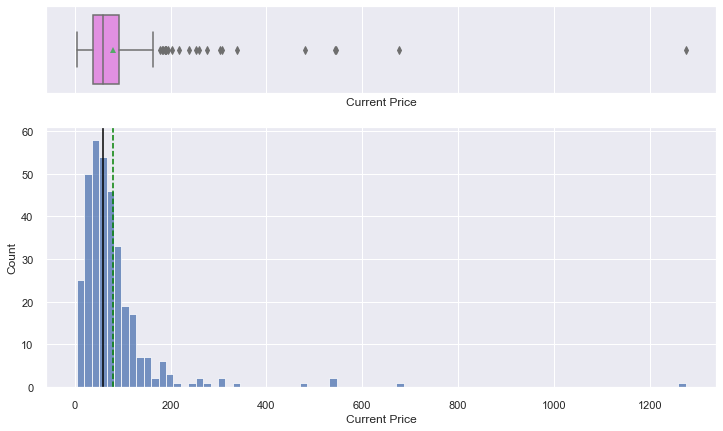

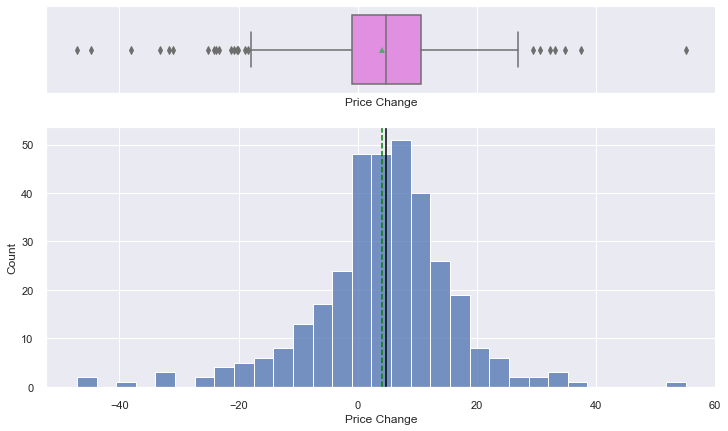

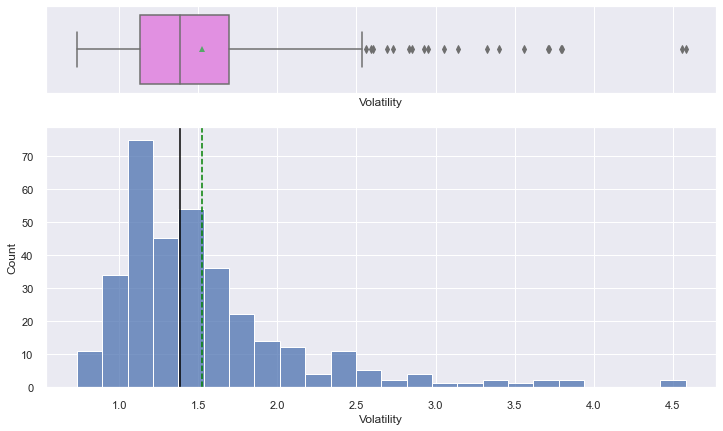

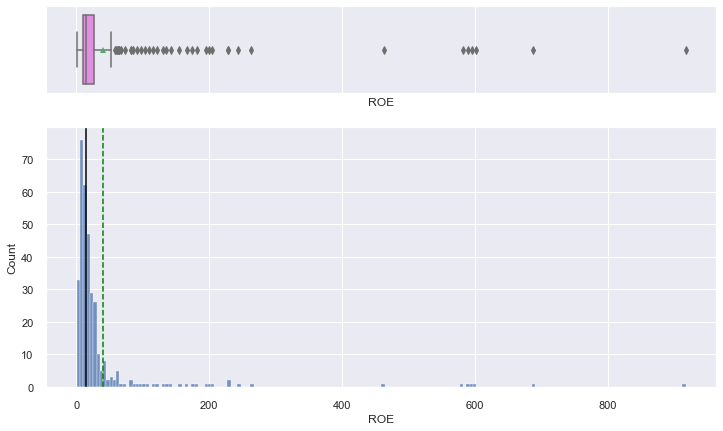

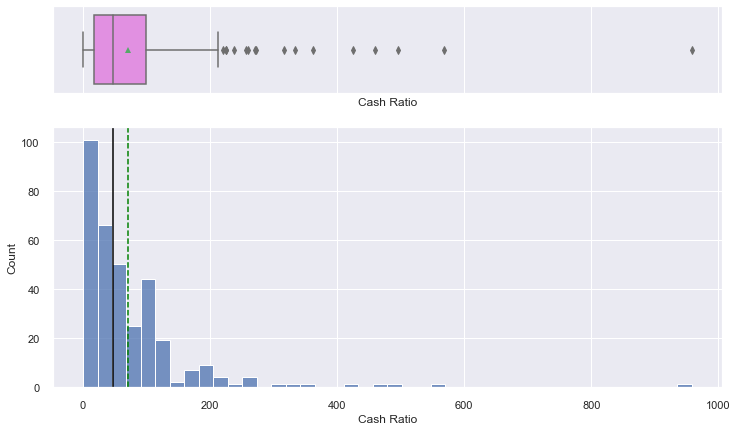

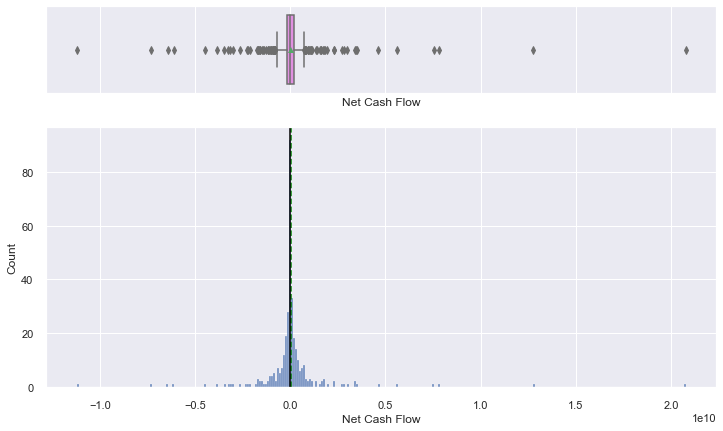

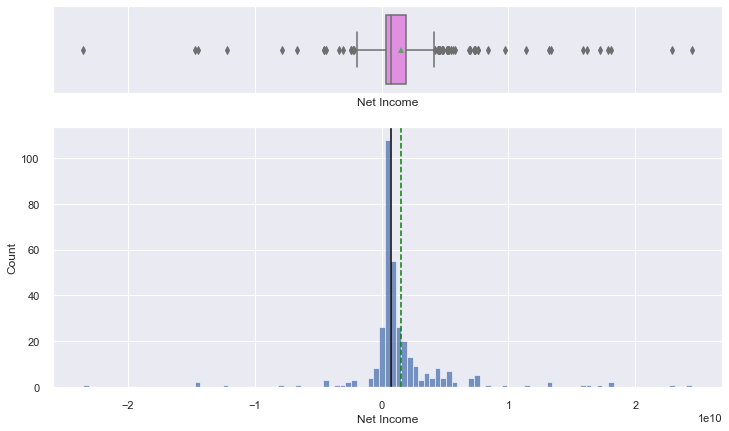

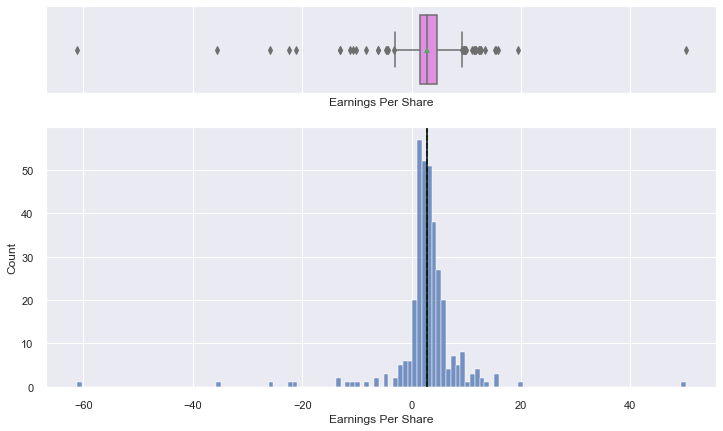

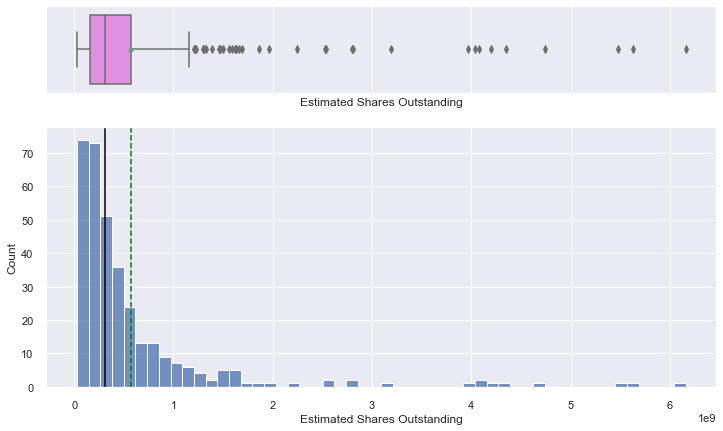

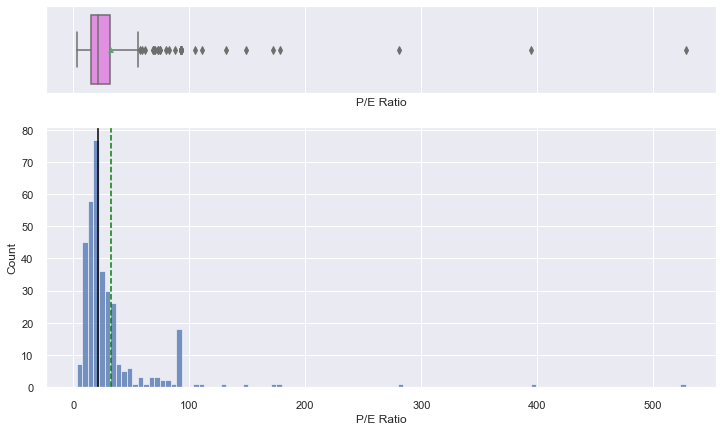

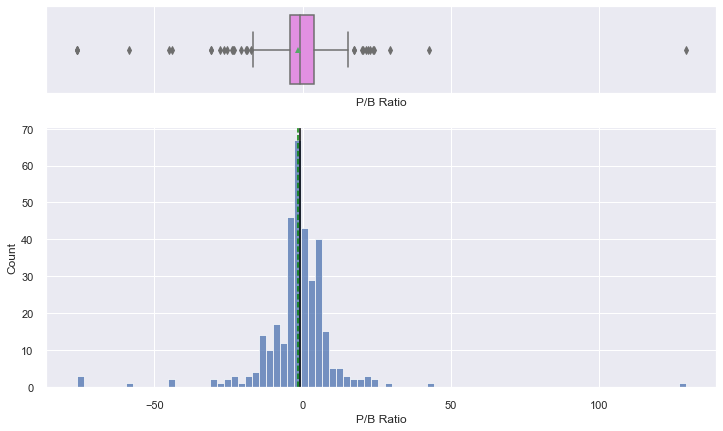

<IPython.core.display.Javascript object>

In [19]:
for feature in df.select_dtypes(include="number"):
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

* So, here we go, most of data are noraml distribution, but some of them are highly right skew.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [20]:
# Check the duplicated rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [21]:
# Check the missing value
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* No missing value and duplicated values in the data.

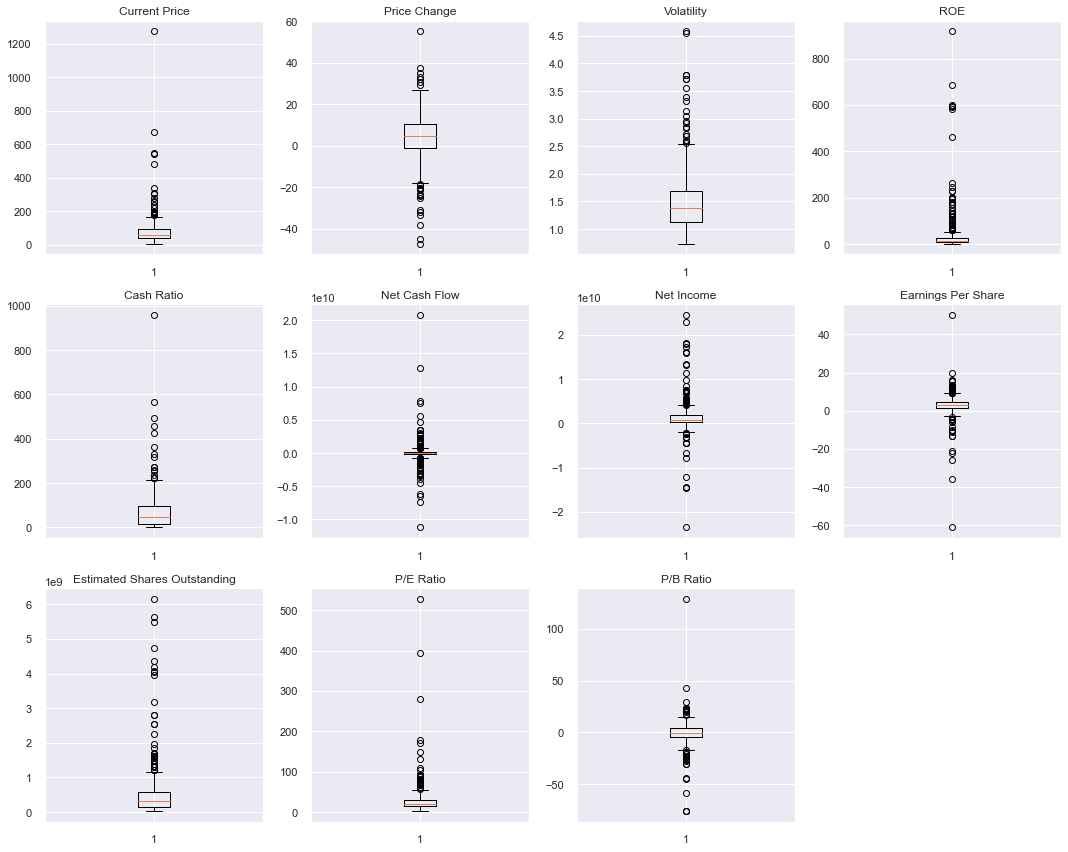

<IPython.core.display.Javascript object>

In [22]:
# Check the outliers
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are too many outliers, but I won't deal with them, because they are the data comes from the real world 

In [23]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [24]:
# data normalization,scale the data
sc = StandardScaler()
scaled_df = pd.DataFrame(
    sc.fit_transform(
        df.drop(
            ["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1
        )
    ),
    columns=df.drop(
        ["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1
    ).columns,
)
scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

* Now, we finished scaling the data.

## EDA Again

In [25]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    float64
 4   Cash Ratio                    340 non-null    float64
 5   Net Cash Flow                 340 non-null    float64
 6   Net Income                    340 non-null    float64
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
dtypes: float64(11)
memory usage: 29.3 KB


<IPython.core.display.Javascript object>

In [26]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,1.453086e-17,1.001474,-0.779918,-0.432101,-0.216088,0.122741,12.195670
Price Change,340.0,-1.502066e-17,1.001474,-4.271357,-0.418535,0.061834,0.551963,4.251806
Volatility,340.0,-6.587868e-17,1.001474,-1.341642,-0.661838,-0.237564,0.286960,5.168258
ROE,340.0,2.873518e-17,1.001474,-0.400362,-0.309599,-0.255142,-0.130667,9.101176
Cash Ratio,340.0,-8.196058e-17,1.001474,-0.775555,-0.576194,-0.255000,0.320933,9.834905
Net Cash Flow,340.0,-7.224613e-18,1.001474,-5.795489,-0.128348,-0.027497,0.058798,10.655237
Net Income,340.0,6.040919e-18,1.001474,-6.359977,-0.290285,-0.200045,0.102842,5.832629
Earnings Per Share,340.0,4.555180e-17,1.001474,-9.725729,-0.185337,0.017990,0.280224,7.192572
Estimated Shares Outstanding,340.0,-1.244511e-16,1.001474,-0.650430,-0.495119,-0.316542,-0.004630,6.609320
P/E Ratio,340.0,1.665335e-17,1.001474,-0.670162,-0.396715,-0.266300,-0.019145,11.187619


<IPython.core.display.Javascript object>

* We can see that the std of each column's data is very close to 1.

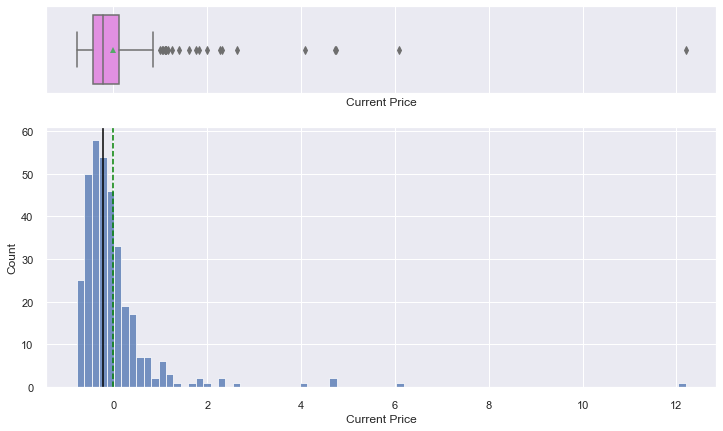

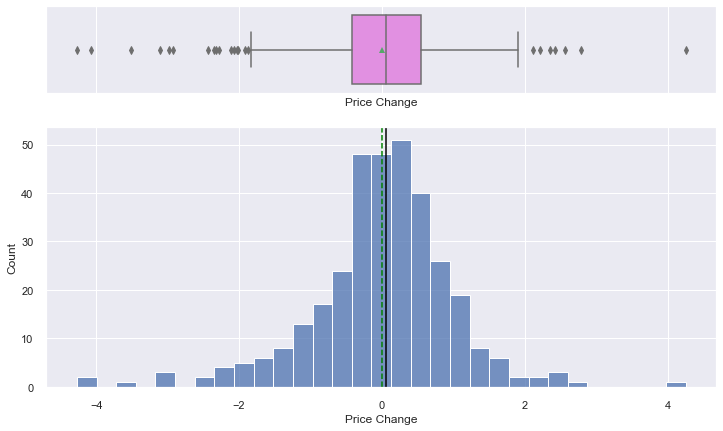

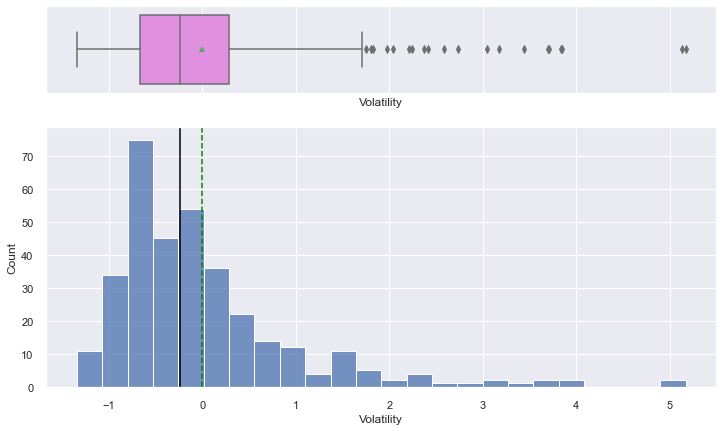

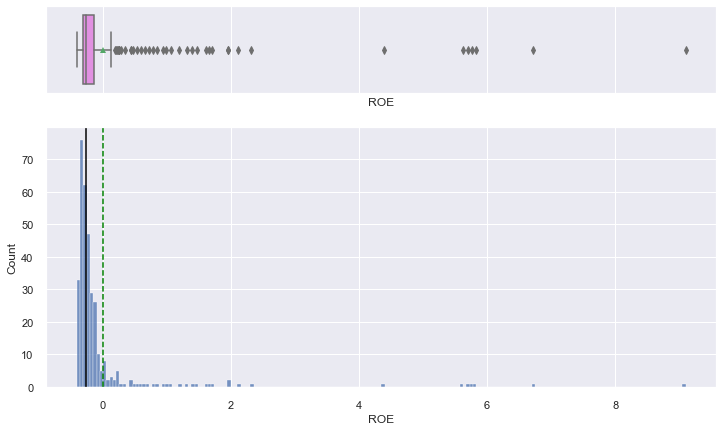

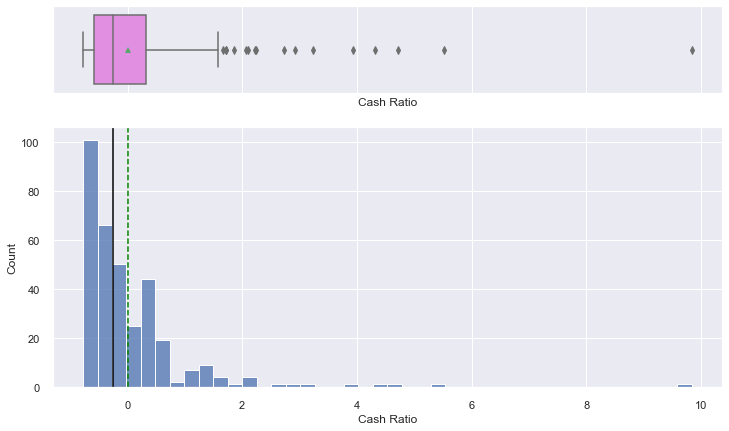

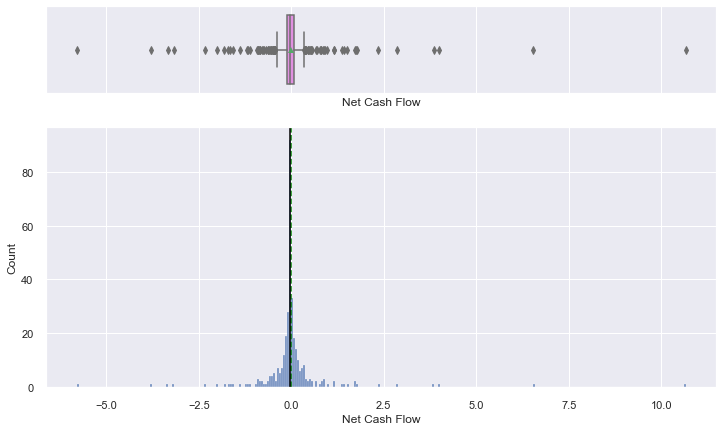

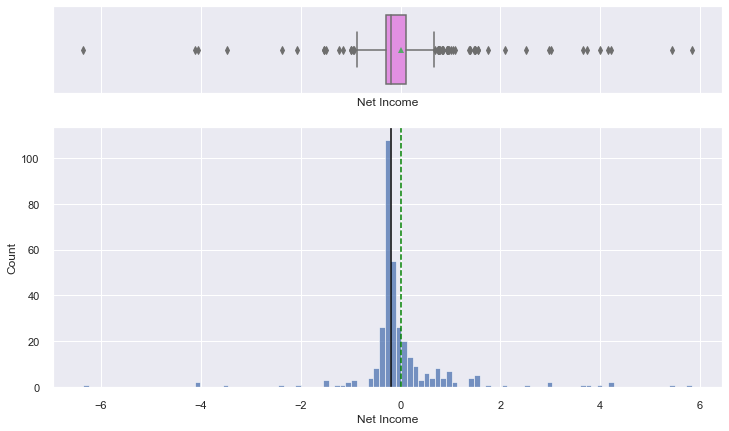

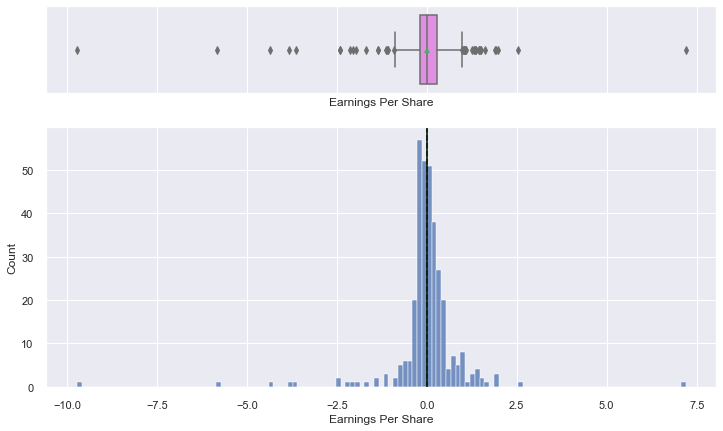

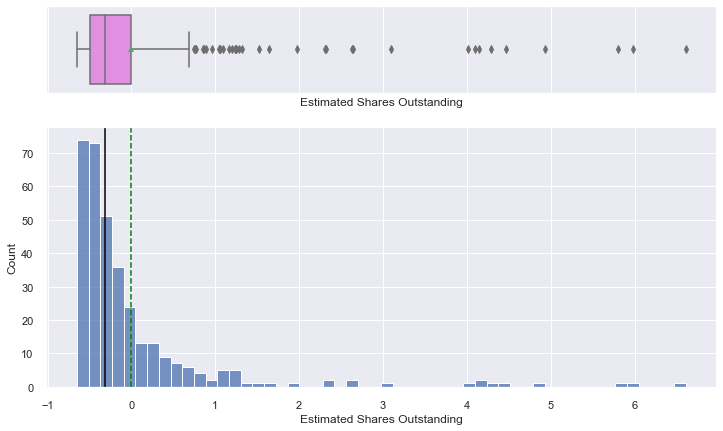

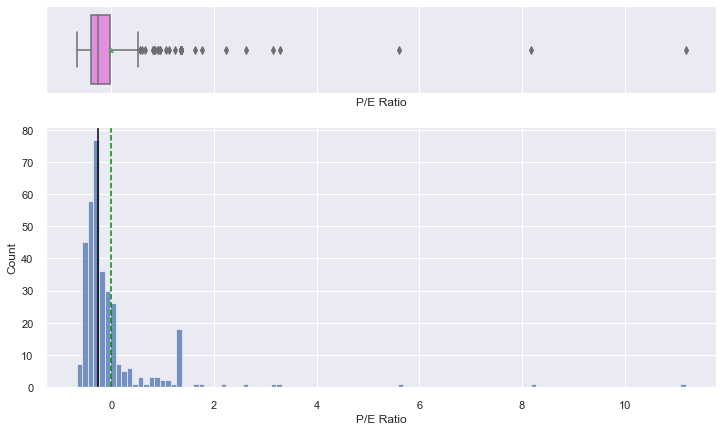

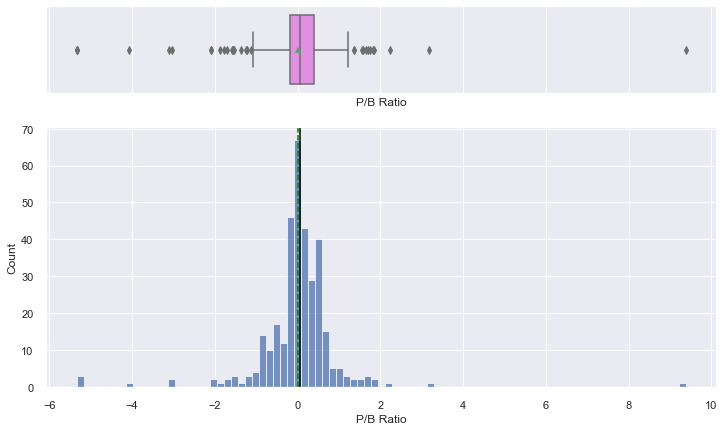

<IPython.core.display.Javascript object>

In [27]:
# Check the distribution again.
for feature in scaled_df.columns:
    histogram_boxplot(scaled_df, feature, figsize=(12, 7), kde=False, bins=None)

* Some of them still right skew, but overall looks good.

In [28]:
df1 = df.copy()
scaled_df1 = scaled_df.copy()

<IPython.core.display.Javascript object>

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2659355306126447
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.142914462491168
Number of Clusters: 6 	Average Distortion: 2.072769863902725
Number of Clusters: 7 	Average Distortion: 2.037101176390918
Number of Clusters: 8 	Average Distortion: 1.941836050864494
Number of Clusters: 9 	Average Distortion: 1.8985753719250187


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

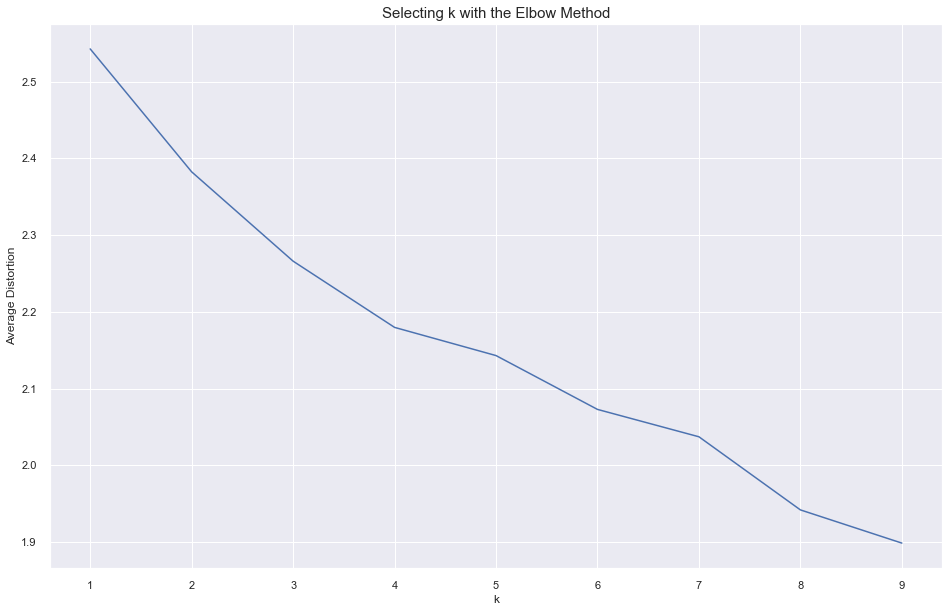

<IPython.core.display.Javascript object>

In [29]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction = model.predict(scaled_df)
    distortion = (
        sum(np.min(cdist(scaled_df, model.cluster_centers_, "euclidean"), axis=1))
        / scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=15)

* From the above chart, 4 and 7 might be the appropriate cluster number.

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.4261512779440718
For n_clusters = 6, silhouette score is 0.42242860748137073
For n_clusters = 7, silhouette score is 0.42034451170491316
For n_clusters = 8, silhouette score is 0.40744333123641496
For n_clusters = 9, silhouette score is 0.2674834472919469


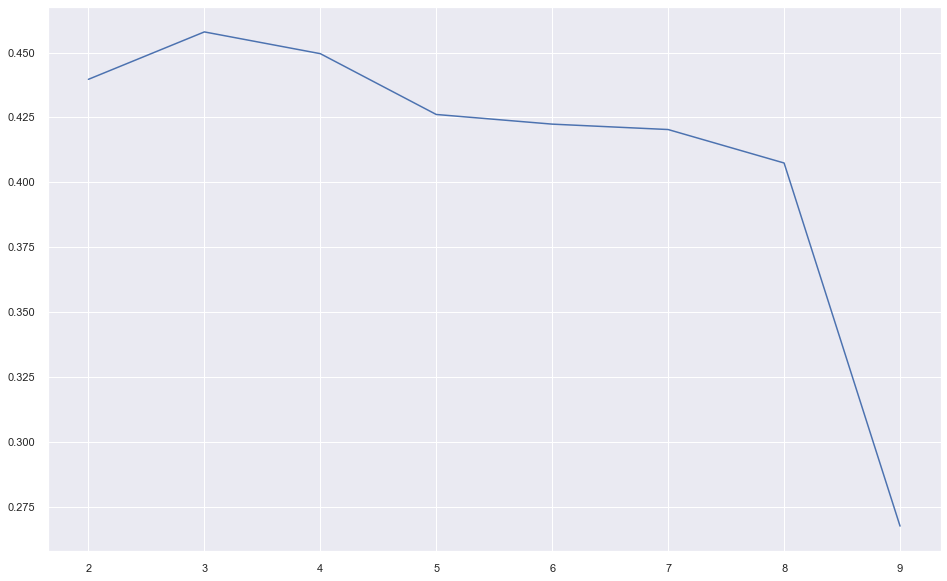

<IPython.core.display.Javascript object>

In [30]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

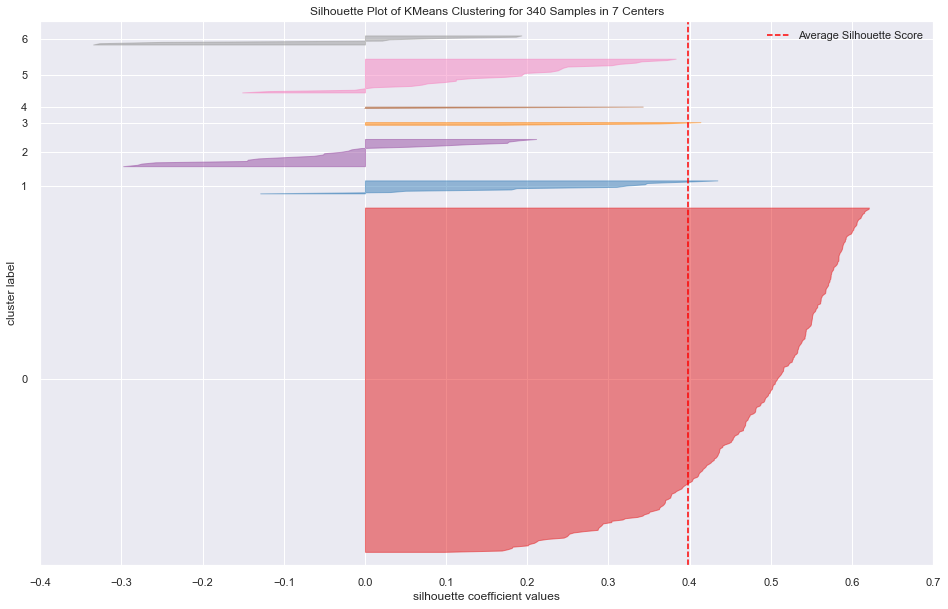

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

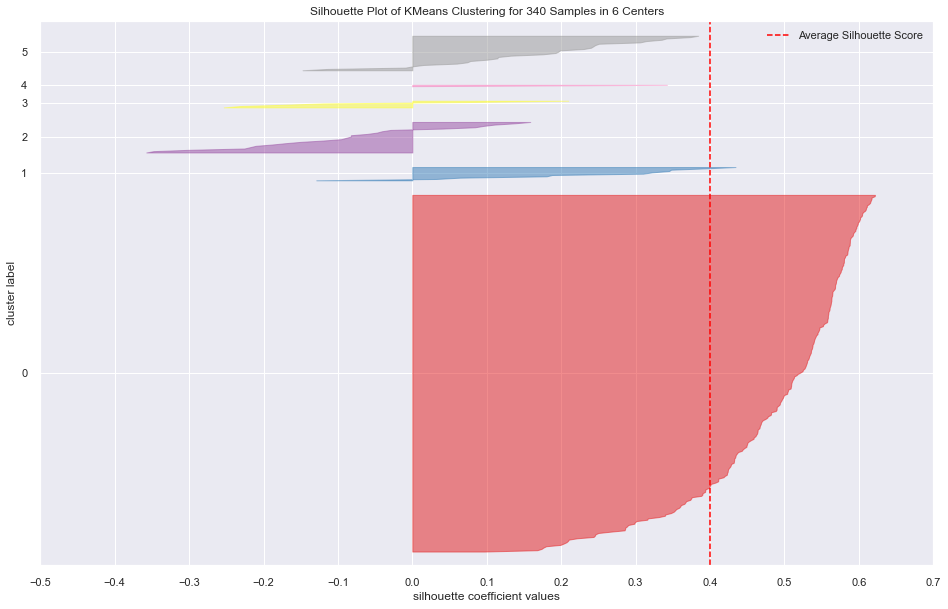

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [32]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

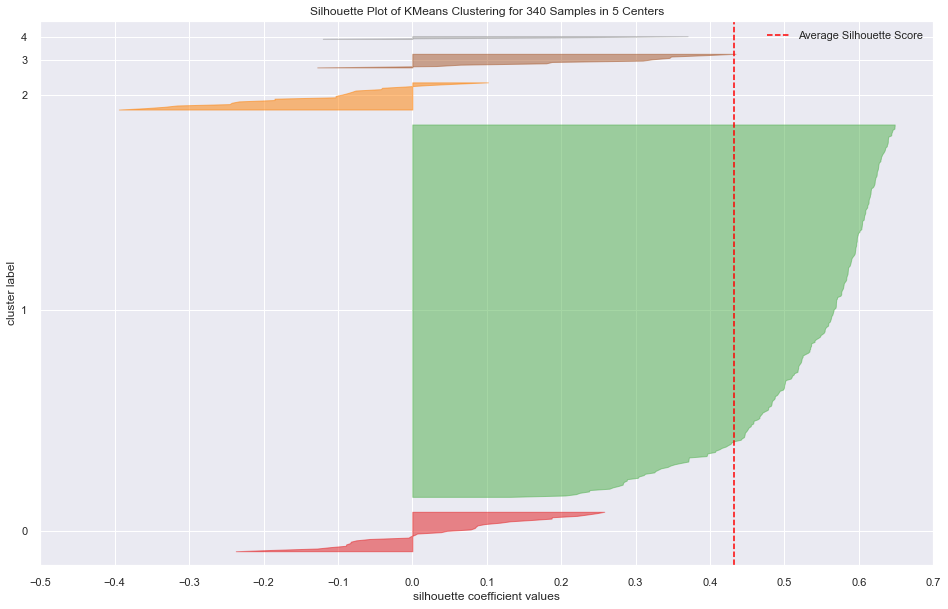

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

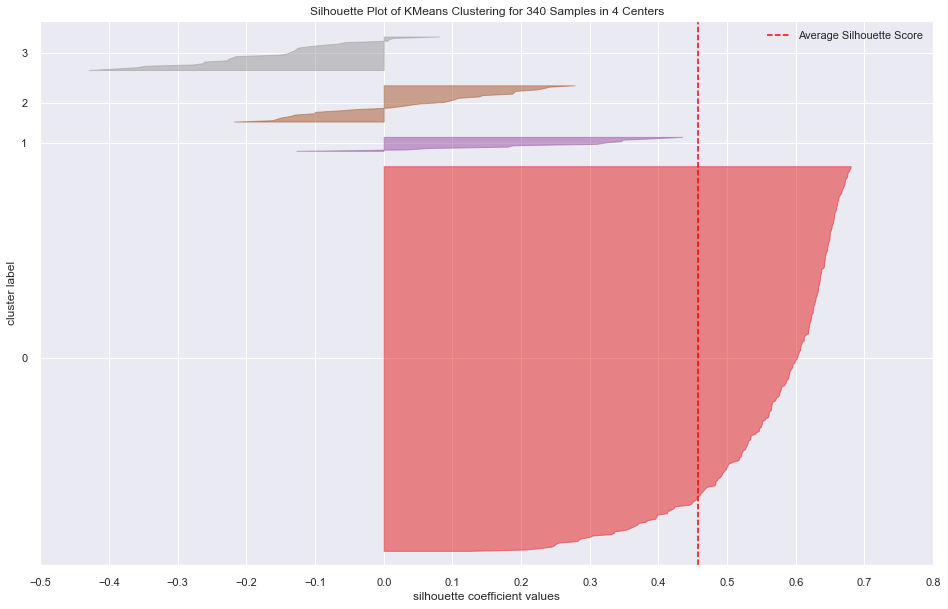

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

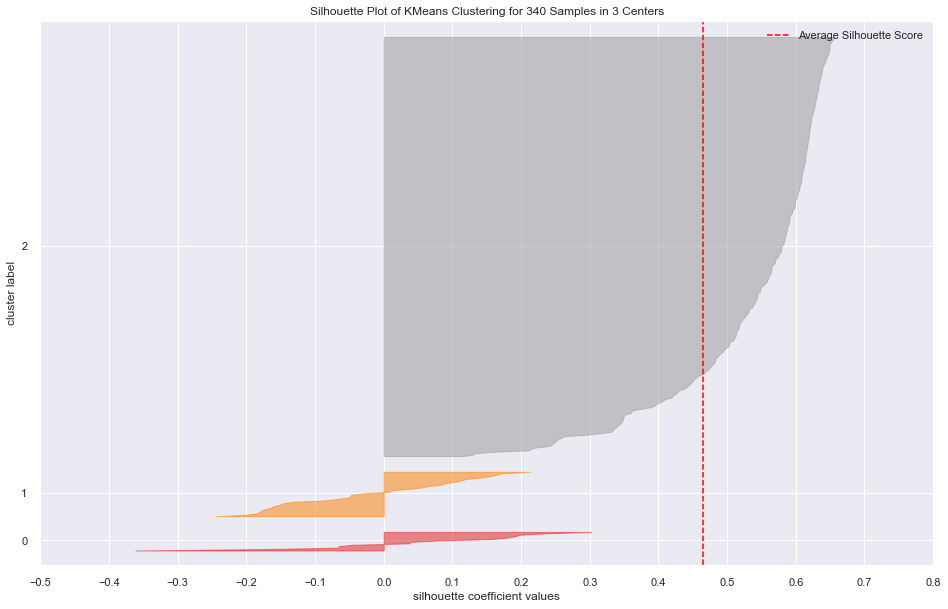

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

### Selecting final model

**Let's take 4 as the appropriate no. of clusters.**

In [36]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [37]:
df["group"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [38]:
cluster_profile = df.groupby("group").mean()

<IPython.core.display.Javascript object>

In [39]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("group")["Cash Ratio"].count().values
)

<IPython.core.display.Javascript object>

In [40]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
group,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


<IPython.core.display.Javascript object>

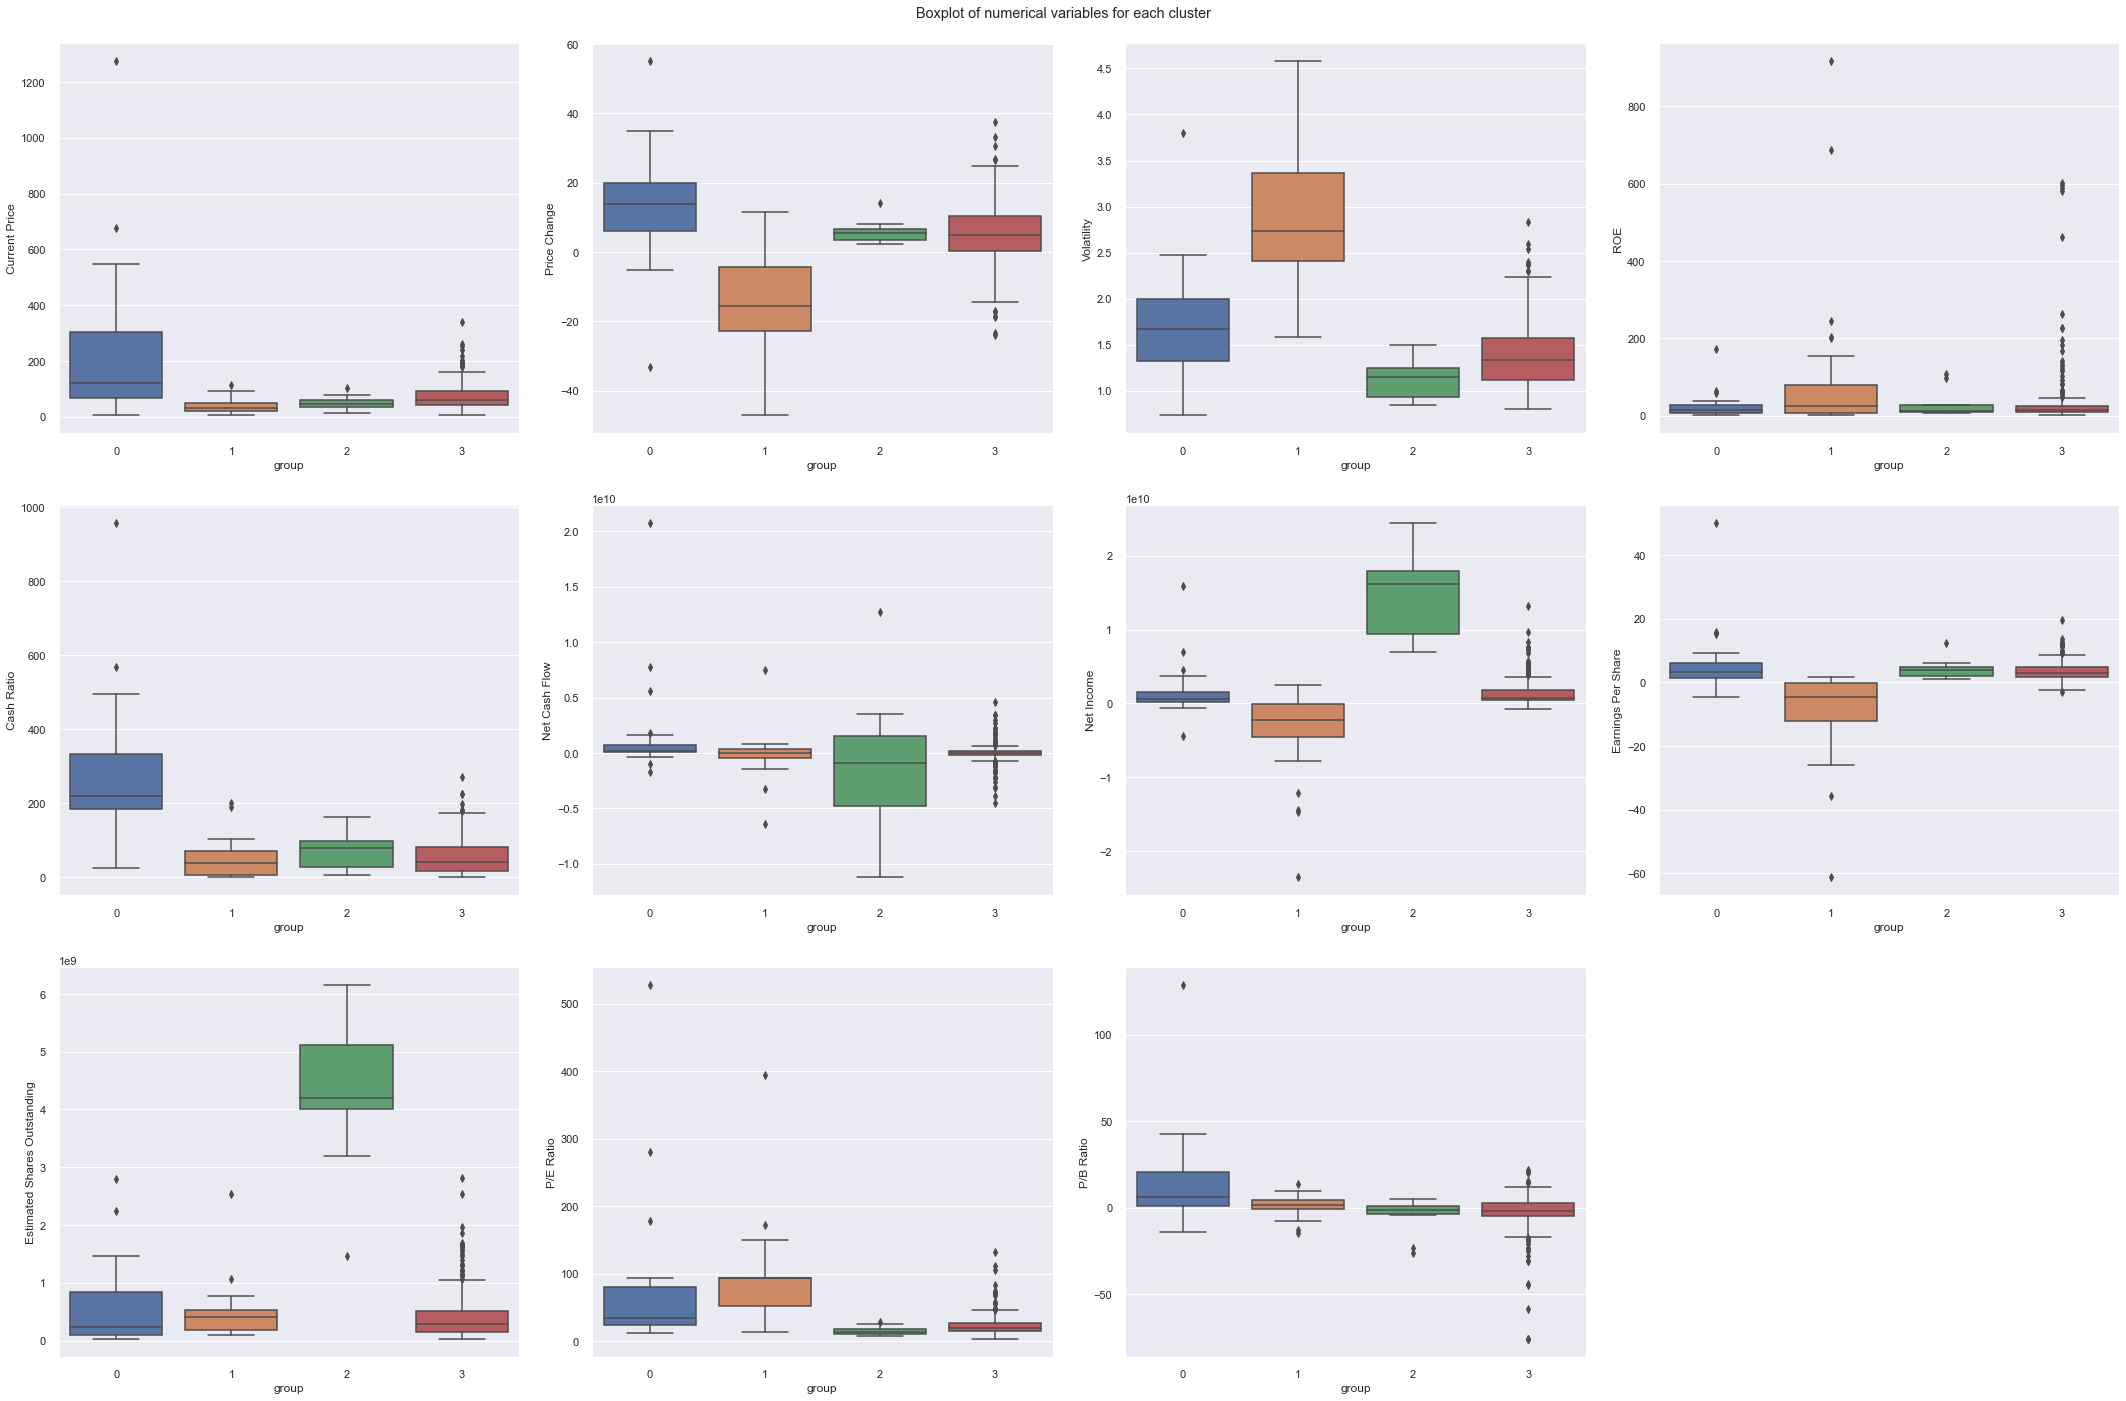

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(30, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(df_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x="group", y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='group'>

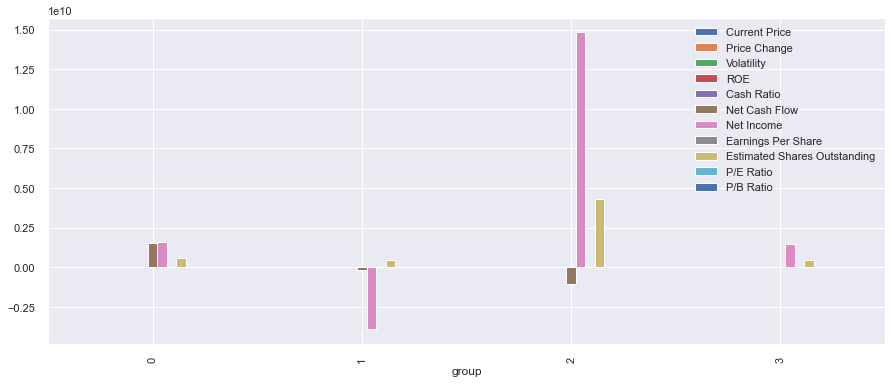

<IPython.core.display.Javascript object>

In [42]:
df.groupby("group").mean().plot.bar(figsize=(15, 6))

### Insights

##### Group 0
- Overall, the current price is higher than the other three groups
- Higher Cash ratio than other groups
##### Group 1
- Higher Volatility than other groups
- The lowest Earnings Per Share is in this group
##### Group 2
- Estimated Shares Outstanding and Net Income are pretty higher than other groups
##### Group 3
- Group3 has no too prominent values, all values are moderate

## Hierarchical Clustering

### Checking Cophenetic Correlation

In [43]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df1))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [44]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [45]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_df1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_df1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [46]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

* See the dendrograms for the different linkage methods.

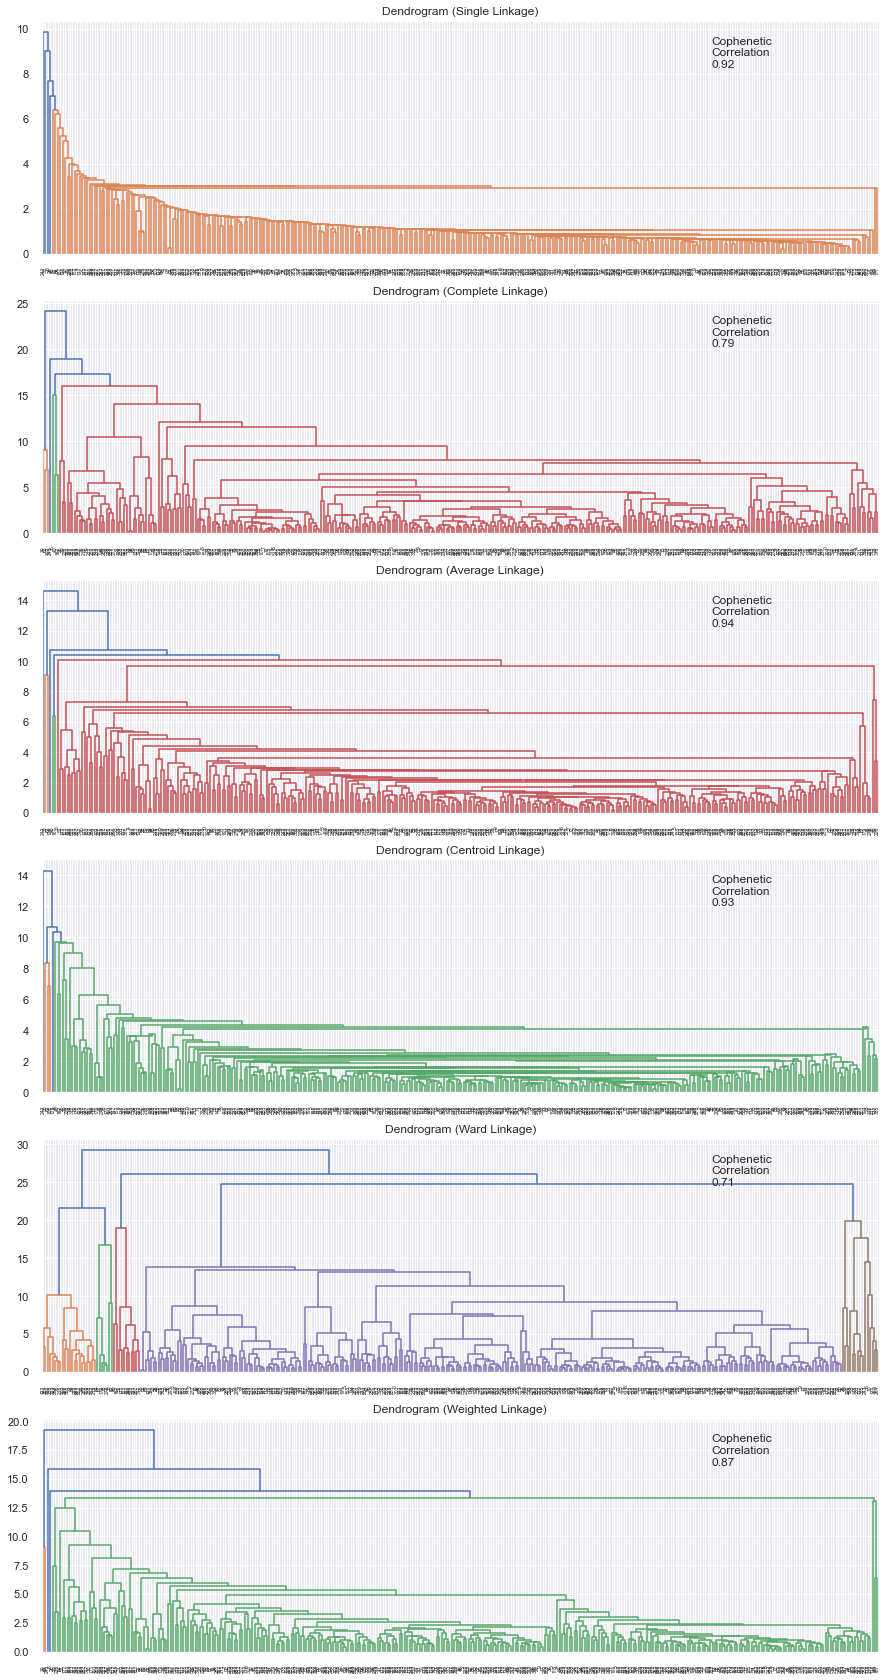

<IPython.core.display.Javascript object>

In [47]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_df1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_df1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average linkage methods.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [48]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(scaled_df1)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [49]:
scaled_df1["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [50]:
hc_cluster_profile = df1.groupby("HC_Clusters").mean()
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
group,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1.554927e+09,1.572612e+09,6.045200,5.783163e+08,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-1.404622e+07,1.482212e+09,3.621029,4.385338e+08,23.843656,-3.358948,277


<IPython.core.display.Javascript object>

In [51]:
hc_cluster_profile["HC_count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Net Income"].count().values
)

<IPython.core.display.Javascript object>

In [52]:
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
group,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1.554927e+09,1.572612e+09,6.045200,5.783163e+08,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-1.404622e+07,1.482212e+09,3.621029,4.385338e+08,23.843656,-3.358948,277


<IPython.core.display.Javascript object>

In [53]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


<IPython.core.display.Javascript object>

In [54]:
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following countries are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following countries are present:
['Energy']

In cluster 3, the following countries are present:
['Information Technology']

In cluster 1, the following countries are present:
['Consumer Discretionary']



<IPython.core.display.Javascript object>

**We see that there are 3 clusters of one GICS Sector, and all the other GICS Sector are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

## Creating Final HC Model

In [55]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(scaled_df1)

AgglomerativeClustering(n_clusters=6)

<IPython.core.display.Javascript object>

In [56]:
scaled_df1["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [57]:
HCfinal_cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [58]:
HCfinal_cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["GICS Sector"].count().values
)

<IPython.core.display.Javascript object>

In [59]:
for cl in df1["HC_Clusters"].unique():
    print(
        "The",
        df1[df1["HC_Clusters"] == cl]["GICS Sector"].nunique(),
        "GICS Sector in cluster",
        cl,
        "are:",
    )
    print(df1[df1["HC_Clusters"] == cl]["GICS Sector"].unique())
    print("-" * 100, "\n")

The 11 GICS Sector in cluster 3 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 8 GICS Sector in cluster 0 are:
['Information Technology' 'Health Care' 'Financials'
 'Consumer Discretionary' 'Real Estate' 'Telecommunications Services'
 'Consumer Staples' 'Materials']
---------------------------------------------------------------------------------------------------- 

The 5 GICS Sector in cluster 1 are:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Financials']
---------------------------------------------------------------------------------------------------- 

The 3 GICS Sector in cluster 2 are:
['Health Care' 'Consumer Discretionary' 'Information Technology']
--------------------------------------------------

<IPython.core.display.Javascript object>

**Now the clusters seem to have more variability.**

In [60]:
HCfinal_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,152.566666,14.908086,1.769506,24.434783,281.913043,1747221304.347826,1866621956.521739,3.802174,759756952.867391,38.674023,16.027369,23
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


<IPython.core.display.Javascript object>

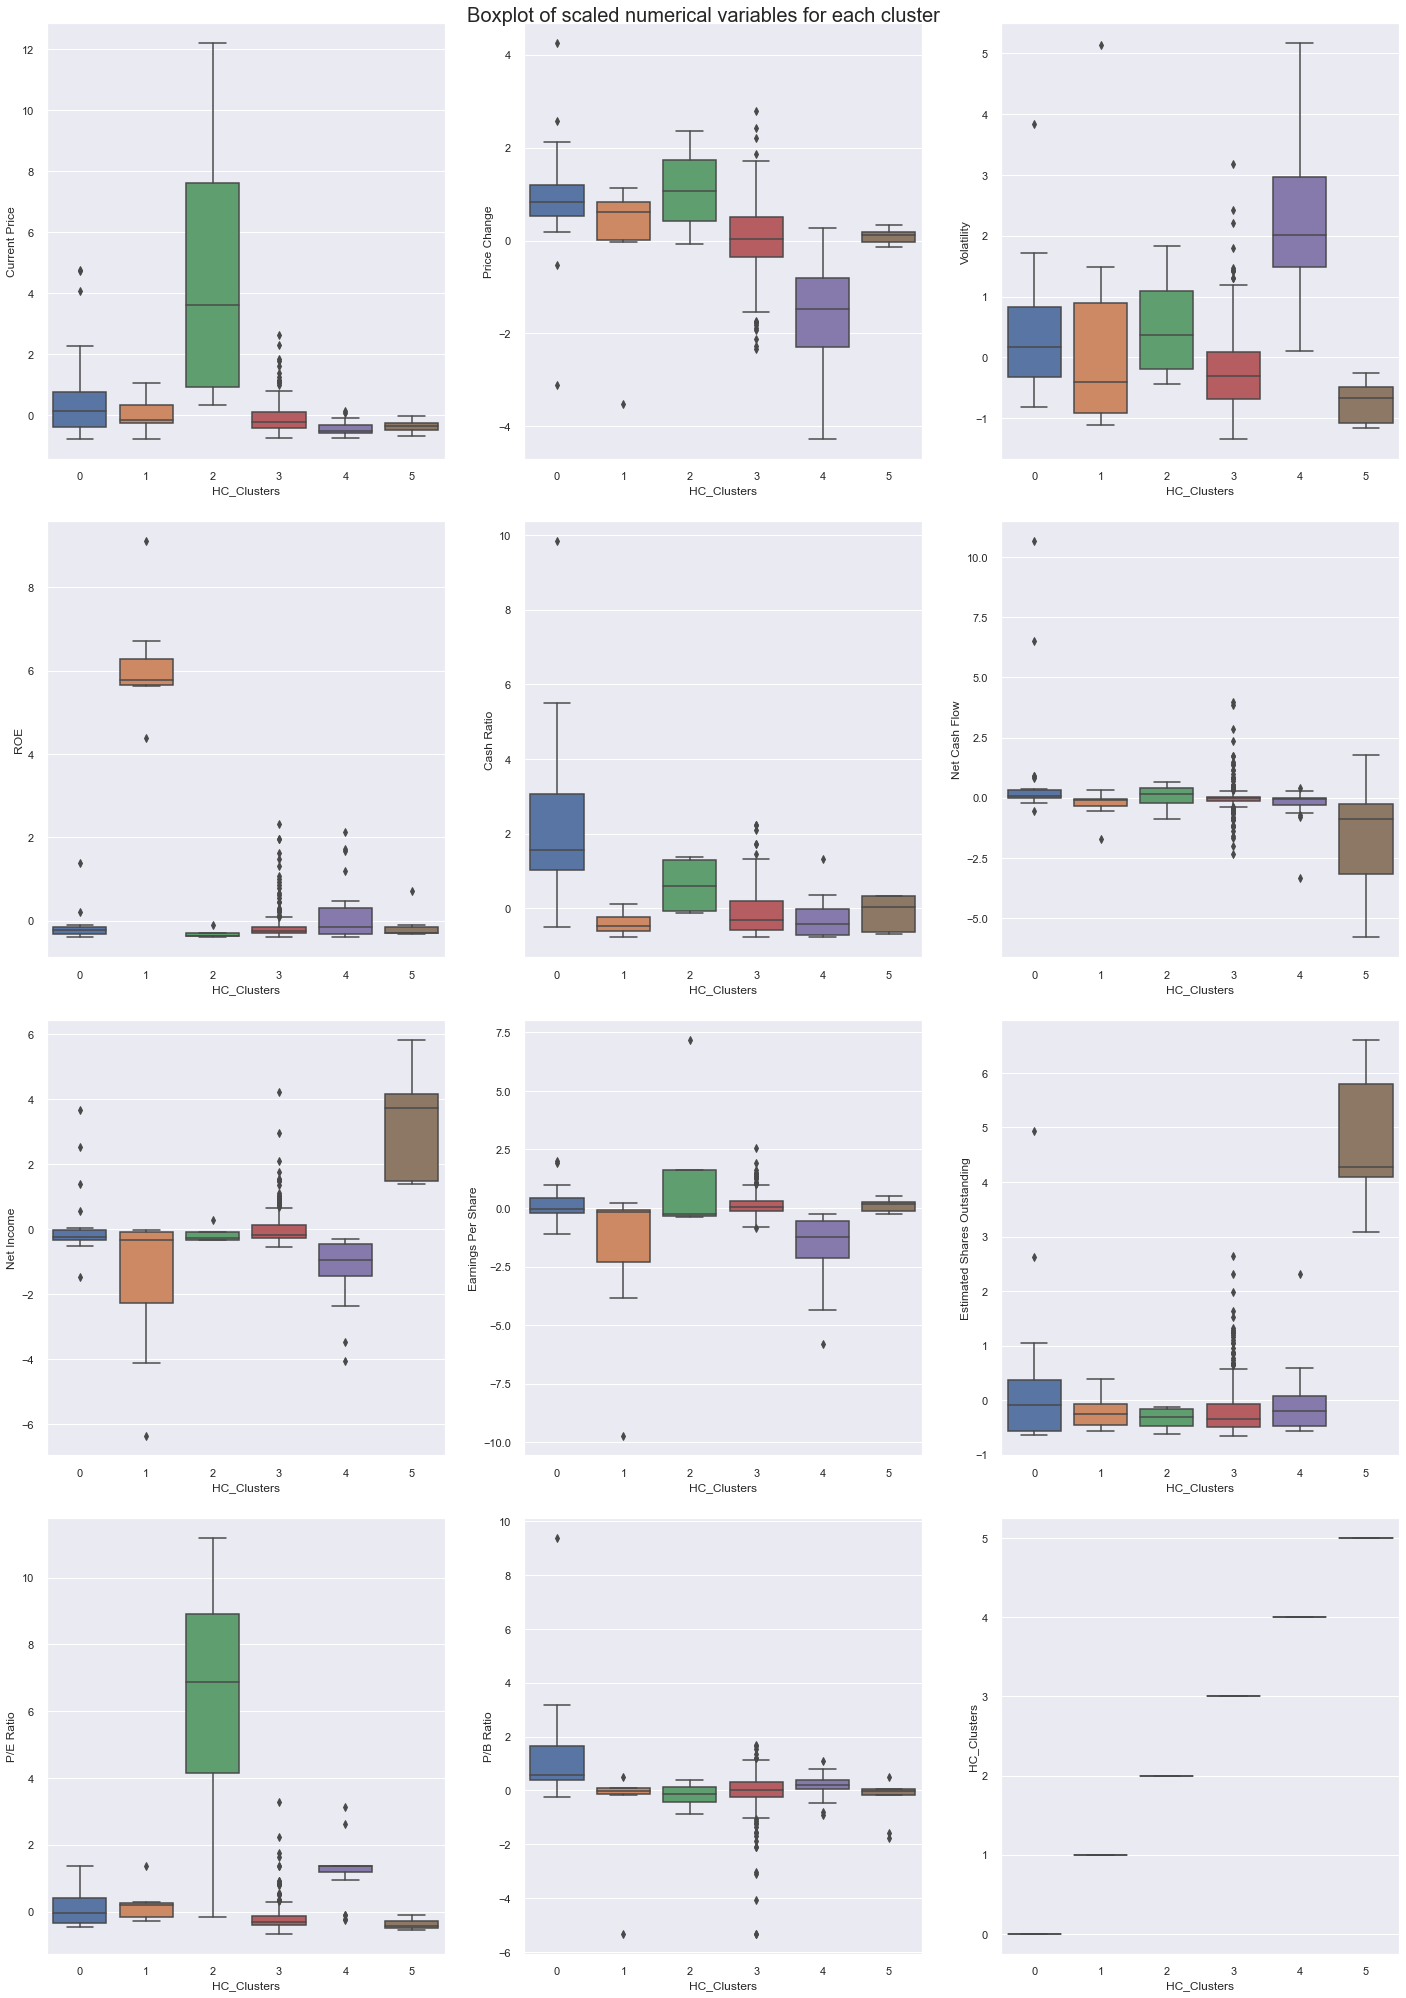

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(df1.select_dtypes(include="number")):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=scaled_df1, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

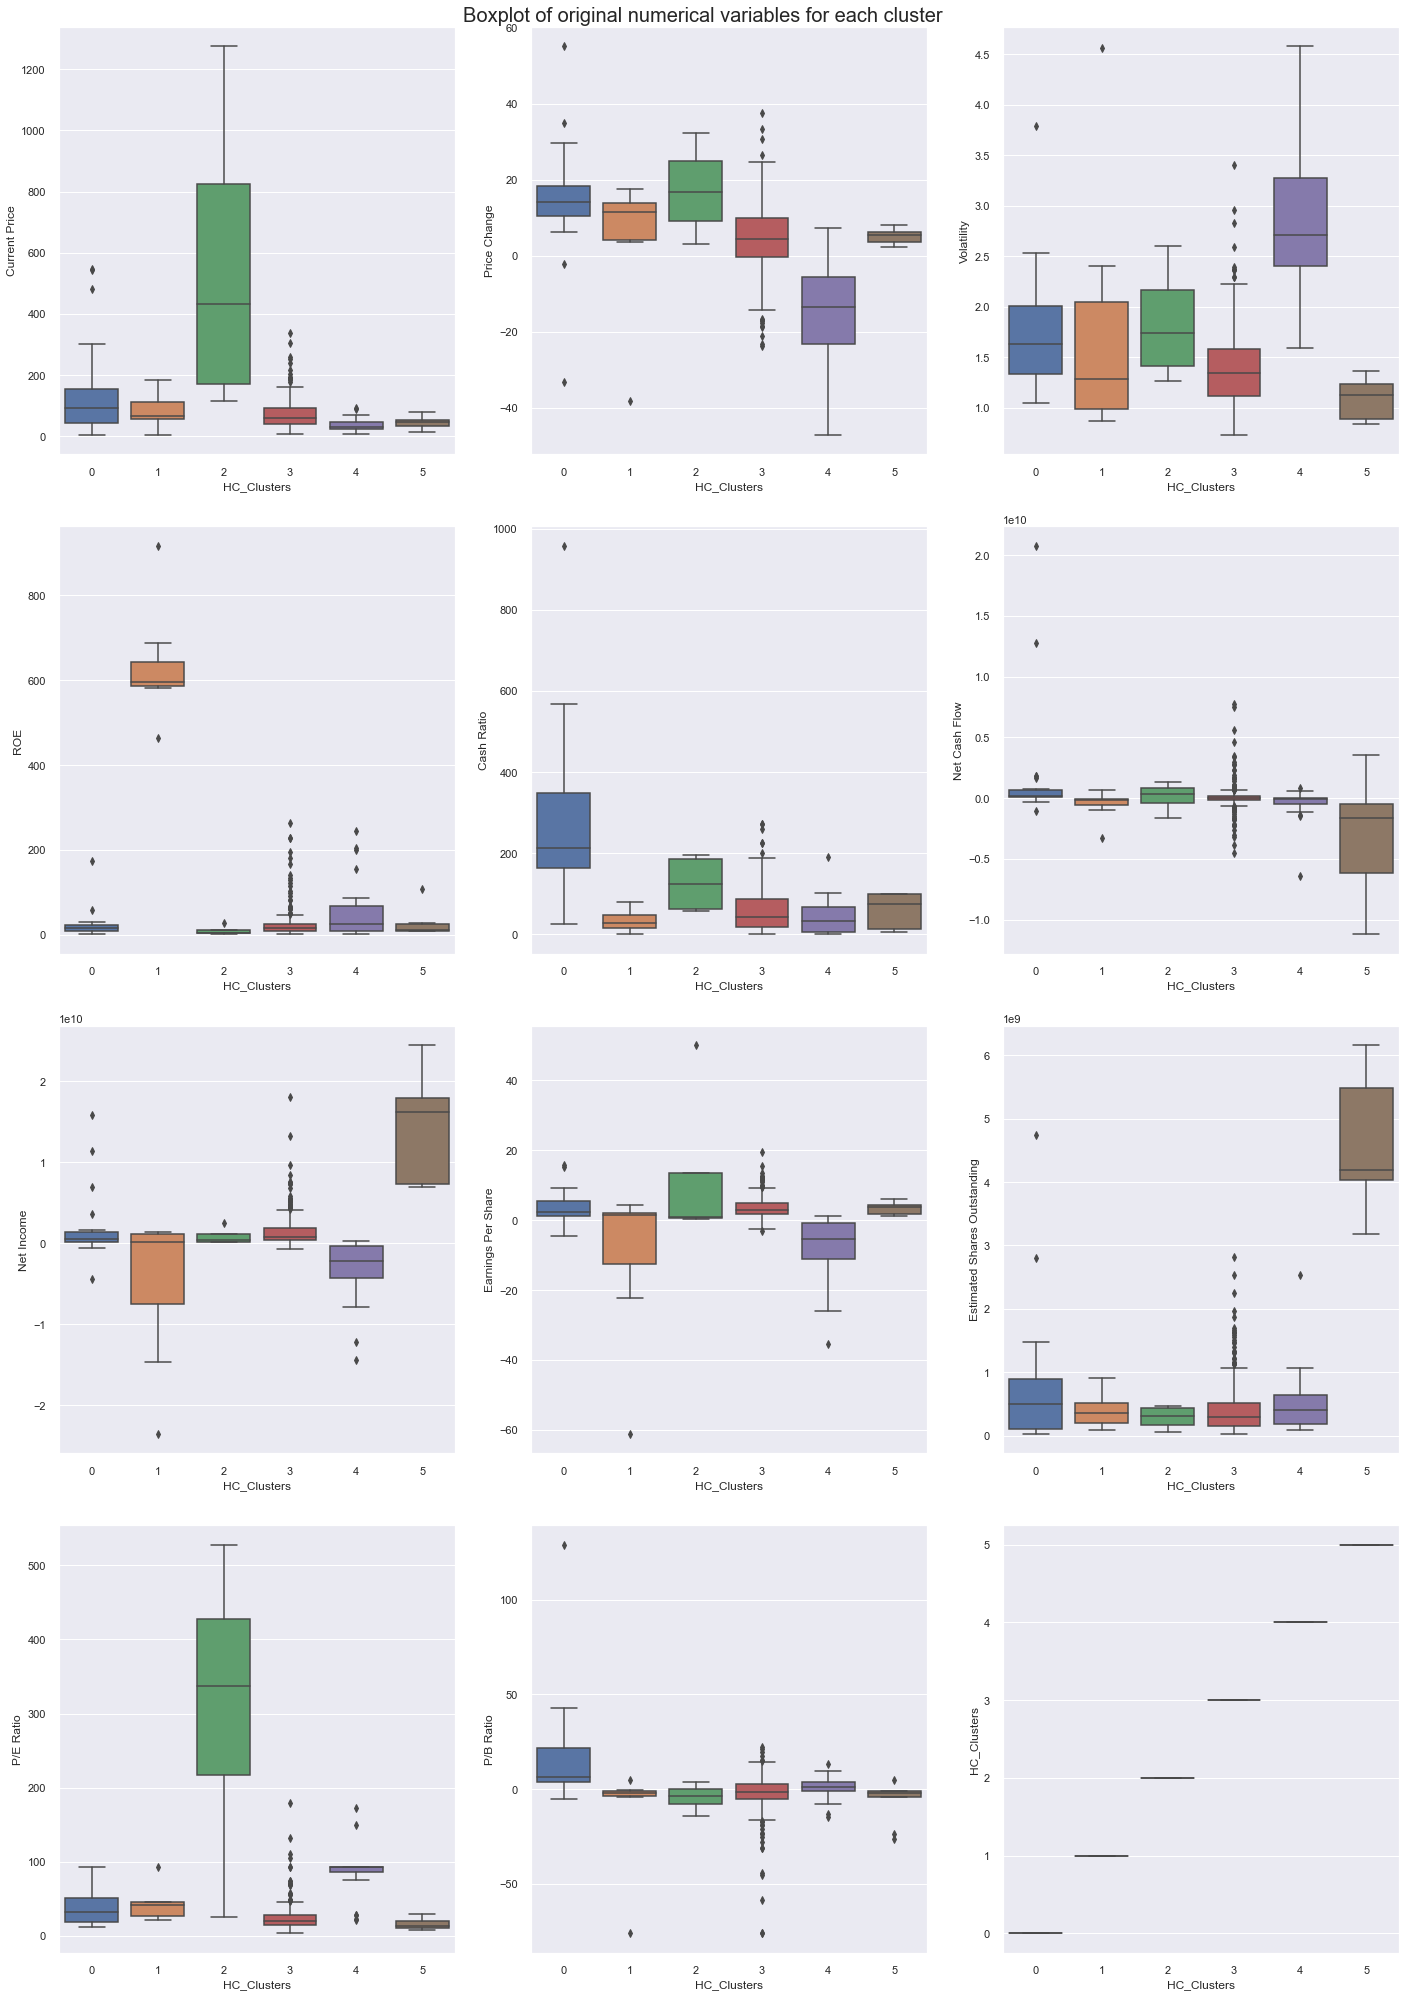

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(df1.select_dtypes(include="number")):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df1, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

We will look into clusters 0, 3, and 4 only because the other clusters have only less than 10 counts in them.

- **Cluster 0**
   - There are 23 GICS Sector in this cluster.
   - Cash ratio in cluster 0 is pretty high, and variable is bigger than others.
   
   
- **Cluster 3**
   - There are 275 GICS Sector in this cluster.
   - All the variables i the cluster 3 are moderate, and that's why it contains the most number of gics sector
   
   
- **Cluster 4**
   - There are 22 GICS Sector in this cluster.
   - Volatility in cluster 4 got the highest variation among all the clusters.
   - but other varialbes are quite moderate.

## K-means vs Hierarchical Clustering

In [63]:
df["HC_Clusters"] = df1["HC_Clusters"]

<IPython.core.display.Javascript object>

In [64]:
df

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,group,HC_Clusters
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,3,3
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,3,3
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,3,3
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,3,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775,0,0
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260,3,3
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449,3,3
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096,3,3


<IPython.core.display.Javascript object>

In [65]:
df.loc[df["group"] == df["HC_Clusters"]].shape[0]

287

<IPython.core.display.Javascript object>

- Obviously, kmeans runs faster and takes less time.
- However, the Hierarchical cluster approach can provide us with more variation, more groupings
- There are 287 observations are there in the similar clusters of both algorithms?
- In the K-means algorithm, the appropriate cluster number is 4, however, in the Hierarchical clustering 6 is the suitalbe number of clusters.

## Actionable Insights and Recommendations

- Personally, Kmeans may be more suitable for this study.
- Also, in future research, we might be able to add PCA to reduce the number of variables while allowing us to increase the likelihood of the final visualization.
- For the user, they can obviously judge how he should classify the stocks he owns based on the boxplot of each variable after we group. For example, if his stock has high Volatility and also has low price change characteristics, then the stockholder should group them into one category and use roughly the same strategy to invest and manage that category's stock.